> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [13]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [14]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1
    h_X,w_X = X.shape
    h_K,w_K = K.shape
    h_res=h_X - h_K + 1
    w_res=w_X - w_K + 1

    result=np.zeros((h_res,w_res))
    for i in range(h_res):
      for j in range(w_res):
        result[i,j]=np.sum(X[i:i+h_K,j:j+w_K] * K)
    return result
       
    pass


In [15]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [16]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    channel=X.shape[0]
    output_h=X.shape[1] - K.shape[1] + 1
    output_w=X.shape[2] - K.shape[2] + 1
    output=np.zeros((output_h,output_w))
    X_stacked=np.stack(X,axis=0)
    K_stacked=np.stack(K,axis=0)
    for i in range(channel):
        output += corr2d(X_stacked[i], K_stacked[i])

    return output
   

In [17]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [18]:
#for i in range(K.shape[0]):
 #print(K[i])

def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h,o_w)
  
    num_output_channels = K.shape[0]
    o_h = X.shape[1] - K.shape[2] + 1
    o_w = X.shape[2] - K.shape[3] + 1
    output = np.zeros((num_output_channels, o_h, o_w))
    for i in range(num_output_channels):
     output[i] = corr2d_multiple_input_channels(X, K[i])
    return output 
    
    

In [19]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

A greater stride minimizes the number of computations necessary in the convolutional layer, resulting in faster training and inference times

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [20]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [21]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)


[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [44]:

X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2                   # use this learning rate
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential()

model.add(Conv2D(filters=1, kernel_size=(1, 2), input_shape=(  1, 6, 8,1), use_bias=False))

class ValueatKernel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch=50, logs=None):
        weights = self.model.get_weights()
        kernel = weights[0]
        print(" Kernel: ", 1+epoch)
        print(kernel)
learning_rate = 3e-2
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')
model.add(tf.keras.layers.Conv2D(1, ( 1, 1), activation = 'relu'))
model.fit(X, Y, epochs=50, callbacks=[ValueatKernel()])
    

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.2855 Kernel:  1
[[[[-0.07835685]]

  [[ 0.696731  ]]]]
1/1 [==============================] - 1s 546ms/step - loss: 0.2855
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 0.2766 Kernel:  2
[[[[-0.1065216]]

  [[ 0.696731 ]]]]
1/1 [==============================] - 0s 17ms/step - loss: 0.2766
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 0.2700 Kernel:  3
[[[[-0.13477063]]

  [[ 0.7158927 ]]]]
1/1 [==============================] - 0s 19ms/step - loss: 0.2700
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 0.2654 Kernel:  4
[[[[-0.16346958]]

  [[ 0.73928404]]]]
1/1 [==============================] - 0s 12ms/step - loss: 0.2654
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 0.2597 Kernel:  5
[[[[-0.19250865]]

  [[ 0.7595598 ]]]]
1/1 [==============================] - 0s 12ms/step - loss: 0.2597
Epoch 6/50
1/1 [==============================] - E

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    
 
  output_height = X.shape[0] // K[0] +1
  output_width = X.shape[1] // K[1] + 1
  output = np.zeros((output_height, output_width))
    
  for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.max(X[i*K[0]:(i)*K[0]+K[0], j*K[1]:(j)*K[1] + K[1]])
    
  return output
    

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)

max_pool2d(X,(2,2)) #check if the output matches with your calculation

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

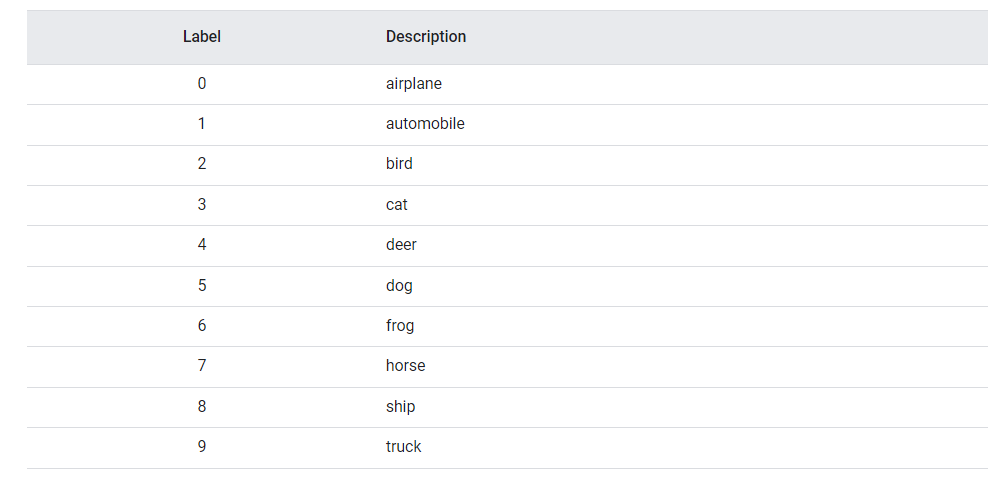

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:Adaptive Moment Estimation(adam) is the most popular,powerful and widely used optimizer for updating the parameters of neural network training.
It is an algorithm for optimization technigue for gradient descent.This is very efficient  when working with large problems involving a lot of data or parameters.It
requires less memory as compare to other optimization technique.It is a combo of the 'gradient descent with momentum' algorithm and the 'RMSP' algorithm.
Since weight updation in gradient descent is not straight forward therefore lot of time is wasted to reach local minima so to reduce the time taken to train a model we use optimization
and the best technique algorithm is adam.
The algorithm computes individual adaptive learning rates for each parameter by estimating the mean and variance of the gradients.It maintains a dynamic mean and gradient square very 
steeply with decay rates to adjust learning rates accordingly.By using adam we can scale the learning rate adaptively for each parameter based on previous gradients.This adaptive scaling
allows faster convergence,it also helps mitigate the issues of vanishing or exploding gradients.
The algorithm of adam involves three steps during each iteration:
1.Computation of gradient:refers to calculation of partial derivatives of a loss function with respect to the parameters of a neural network.It rrepresent the steepest descent or ascent
in the parameter space .Back propogation is very efficient way of computing gradient.
2.updation of moments:adam maintains the moving mean of gradient and squared gradient.These are updated based on the current gradient and the decay rates for the first and second moments,
 respectively.
3.Updating the parameters:The parameters of the network are updated using adapting rates calculated from mean and variance of gradients.The update step involves scaling the gradients by
 the learning rate and applying them to the parameters.

 https://www.geeksforgeeks.org/adam-optimizer-in-tensorflow/
 https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
"""

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: Validation accuracy is measure of how well the trained model work on unseen dataset whichb are not seen during training.
This is essential way to check on the model's generalization capability and effectiveness in making accurate predictions on new 
unseen datas.In the above data ,validation accuracy is around range of 0.09-0.11.In the range of 0.09 to 0.1, the validation accuracy
suggests that the model is performing poorly on the validation data and is making incorrect prediction in the majority of cases. It means 
that the model's predictions align with the correct labels for only around 9% to 11% of the examples in the validation dataset.This suggest 
that it is in struggle for model to improve its perfomance.

https://stats.stackexchange.com/questions/401696/validation-accuracy-vs-testing-accuracy
https://www.kaggle.com/questions-and-answers/56171

"""

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
# Yes before this validation and train acuracy were less as compare to current,where validation accuracy goes upto 0.45 but now it is upto 0.5444.

Are we done with the job?
#Not yet as model is overfitting after a particular epoch value.

What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?
Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.


##After epochs roughly 5,difference between validation and training accuracy is increasing as epoch value increases which implies overfitting of model.
The increasing difference between validation accuracy and training accuracy as the number of epochs increases is a common phenomenon known as overfitting. 
This occurs because model becomes too specialized in learning from the training data and performs poorly on new, unseen data.
Is our model overfitting on the training data so much that it can't work well 
on unseen data.
#Yes,it is as it have higher accuracy for training dataset but not so for validation dataset.

"""

In [ ]:
"""
How are we gonna tackel this problem?
We can use regularization techniques as mentioned in one question.
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: OVERFITTING:
Overfitting is that case when model performs very well on training dataset but fails to generalize on unseen examples.It happens when
model becomes to complex and it just focus more on memorizing training outputs for given input rather than gaining the underlying patterns.
In overfitting we can see large difference between the losses and accuracies of validation and training data.In this model learns to fit the
noise or any random variation on trainig dataset which cause ignorance of some features which can be in validation dataset that result in poor 
performance on validation or test datasets.Concisely,overfitting occurs due to following reasons:
1.Model complexity:When a model is complex with large number of parameters or have large capcity can memorize training dataset.
2.Lack of Training data:When the training dataset is small, the model may have limited exposure to diverse examples.Here model somehow fit the
trainig dataset buut cant on validatin dataset.
3.Lack of regularization:Overfitting will occurs when not enough use of regularization techniques,like L1 or L2 regularization,dropout or early stopping.
4.Difference in data:overfitting occurs when training datasets are different from real world data that model is expected to encounter.
The consequences of overfitting are high training accuracy and low validation or test accuracy. 

UNDERFITTING:
Underfitting is that case for a model when it lack in catching underlyiing patterns and relationship ppresent inthe training data.
It is basically seen when both validation and training accuracy are low,indicating that model is too simple or lacks the capacity to learn
complex patterns and features.When a model is underfitted,it is unable to effectively generalize from the training data to implement on unseen
datas.It means that the model's absorbing features are too less or can say less than required for capturing the intricacies of the data.
Conclusively underfitting of model can arise due to following reason:
1. Insufficient model capacity:It is when model is very simple,have less number of layers,features,units than required to handle complexity of 
the data. 
2.Limiting training data:This is when trainig dataset is too small or unable to represent whole feature for data,that is not enough data to learn
meaningful relationships.
3.Inapropriate features chosen: If important features are excluded or irrelevant features are included, the model may finds difficulty the relevant
 patterns and make accurate predictions.
 The consequences of underfitting are low training and validation accuracy.
https://www.bing.com/search?q=overfitting&form=ANNTH1&refig=b743ed157f7d495c8836f44b7f727b8f
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization techniques in machine learning are methods to prevent overfitting and increase the ability of model to generalize on new unseen dataset.The regularization 
technique creates additional constraints or penalities to the model during training,which reduce its overoptimization on the training data and promots more generalization.With help
of regularization we can balance between fitting the training data well and prevent from overfitting.These are some commonly used regularization technique:
1.L1 and L2 regularization(also known as Ridge and Lasso regression respectively):L1 regularization is used for feature selection and penality term(proportional to the absolute value of weights) 
is added to loss function so that it is more able to generalize and less error
L1 regularization term = λ * Σ|w|
cost function=  loss + λ * Σ|w|
where λ is the is the regularization parameter that controls the strength of regularization.
while L2 regularization adds penality term that is proportional to variance ,this envoke smaller weights
 and helps to have more even importance of each weights.
L2 regularization term = λ1* Σ(w^2)
cost function= Original loss + λ * Σ(w^2)
 λ1 is the regularization parameter,(w^2) denotes the squared value of each weight.
λ and λ1 are very large parameters which give above cost function by approximation.

https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning
https://www.geeksforgeeks.org/regularization-in-machine-learning/
https://stackoverflow.com/questions/39052558/regularized-cost-function-with-very-large-%CE%BB

2.Dropout:In this a randomly unit is dropped or inactive for training purpose,which helps network to more independent features.It helps in reducing interdependency of among neurons and 
reduce overfitting as it become trained to more distincts features.
3.Data Augmentation:It involve different tranformation on training data which leads to same output so that model learns how to manipulate more quickly,this is the variety in the inputs 
which have same output.It reduces overfitting by introducing variety.
4.Batch Normalization:It normalize the inputs of each layer in a neural network by adjusting its mean and variance to 0 and 1 respectively.
5.Early stopping:It is basically monitering the validation dataset performance and when its accuracy start to degrade,training the model is stopped to avoid overfitting. 
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: The dropout layer is a regularization technique used to prevent overfitting of a model.It enhance the capability of a model to generalize by randomly setting some of input units to 0 during the trainig phase.
It cause noise or randomness in the network by dropping some portion of neuron or units in every trainig step. Through this the network of neuron prevented from too much dependent on specific units and encourages the network
to learn more robust and generalizable features. By using dropout ,network of neuron become more resistant to overfitting.During training phase ,those randomly units number which are to be ignored are set as hyperparameter
and it represent the probability of dropping out a unit.It can be possible that in different training iteration different units are dropped.When units are dropped out, their contributions to both the forward pass (activation)
 and the backward pass (gradient computation) are temporarily removed.
 The droput layer helps in preventing overfitting by coadaptation of neurons.It also encourages neurons to evenly dependent and less sensitive to individual units,leading to better performance.Dropout is a common regularization
technique that is leveraged within the state of the art solutions to computer vision tasks such as pose estimation, object detection or semantic segmentation. The concept is simple to understand and easier to implement through
its inclusion in many standard machine/deep learning libraries such as PyTorch, TensorFlow and Keras.

https://www.baeldung.com/cs/ml-relu-dropout-layers
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )
Answer:L1 normalization(also known as Least Absolute Deviations) is a technique used in machine learning to normalize the input vector or matrices(considered rows) by dividing with the sum of absolute values of its element that sum of magnitude is also known as l1 norm.
By normalizing the sum of normalized elements of the vector can go upto 1 only not more than it.The motive of L1 normalization is to bring the vector or row of matrix to specific range and make it easy to compare with other
 vector or rows of matrix(different data) easy.By using L1 normalization in dataset,we can remove the efect of varying scale and magnitude,allows fairer comparisons and stable computations.If a vector have non-negative value
of its component than by normalization it will not change its sign.L1 normalization can result in sparsity in the normalized vector,because if vector have elements close to zero or zero than normalized vector will have more 
lesser magnitude values for each element.Also L1 normalization technique do not change the number of entries of vector.If a element in vector is having 0 value then after L1 normalization its value will be 0.This normalization 
technique is commonly used as a feature scaling to bring features onto a similar scale.It should be consider while using this technique that it is applied carefully and suitability may vary accordingly to datasets.
Its formula for a vector v is given by (L1_normal(v)):
l1 norm=|v1|+|v2|+...+|vn|
L1_normal(vi)= vi/(|v1|+|v2|+...+|vn|) 
∥v∥1=∑|vi|=1

where vi represents the ith element of the vector v and n is the total number of elementsin v.
 If there is a matrix where each row represent vector than we us same formula for each row.

https://stats.stackexchange.com/questions/502387/what-is-the-l1-normalization-of-some-data
"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: L2 normalization (or Euclidean normalization) is a technique to normalize feature vectors or data instance in machine learning.Here scaling of each feature of vector is done by its L2 norm.
The L2 norm of a vector is square root of sum of square of each feature of that vector.For a vector v=[v1,v2,....,vn],the l2 norm ||v||2 is given by:
||x2||2=sqrt(x1^2 + x2^2 +....+xn^2)
the formula for L2 normalization of a feature vectore x is as follows:
L2_normalized(x)=x/||x||2
To imply the L2 normalization on vector v,every features of vector is divided by its L2 norm.By this vector is being scaled to have a unit L2 norm,which means that distance  vector and origin equals 1.
Use of L2 normalization as feature scaling technique to bring different features onto a similar scale.On dividing each feature by its L2norm ,the vector is scaled in that way so all features are of comparable 
magnitudes.This helps to prevent that feature which is dominating the learning process and ensure that all features contribute evenly to the model.L2 normalization transforms the vector into a unit vector also 
known as normal vector whose distance from origin is 1.Thi is very useful in distance-based algorithms,where direction and relative magnitude of the features are more important than its absolute values.
L2 normalization is used as regularization technique to prevent overfitting.By using L2 norm of the weight vector as a penalty term to the loss function, the model is encouraged to have small weights, which
 helps reduce overfitting by reducing the complexity of the model.It should be noted that L2 normalization is also applied carefully as L1 normalization.

https://stats.stackexchange.com/questions/331926/explain-meaning-and-purpose-of-l2-normalization

"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer:Data augmentation is the way to increase training dataset by using modification or various transformation in the copies of existing training datasets.It is use to train model with more variety of input cases
possible for each output,helps model to recognize the  correct output for given input.It improves model's performance and generalization process of machine learning models also improve model robustness.Because
of data augmentation number of sample data increases in training set.It also address the class imbalance,enhance model robustness,and promote noise tolerance.So by expansion of training dataset with transformation 
application ,model can learn more effectively and give efficient result on unseen dataset.Data augmentation in machine learning is needed in machine learning for several reasons as mentioned below:
1.To expand training datase:In many machine learning tasks,having large and diverse training dataset is needed for training correctly and robust models.Since,acquiring a large numbered label dataset can be expansive
 and time consuming,data augmentation provides way to increase training dataset artificially.
2.Generalizing ability: Data augmentation enhance the ability of model to generalize in better than without it.This reduces overfitting, where the model becomes too specialized to the training data and performs poorly 
on unseen data.
3.Addressing class imbalance:In some model,it may be the case that some classes have significantly fewer examples than others.This can lead to biased output and perform poor on less dominated classes.By using data
 augmentation we can create more training input for minority classes.It allows the model to learn feom more balanced representation of classes.
4.Invariance:by application of tranformation like aligment change,rotation, or other the model learns to recognize the features and patterns for all possible casses,which enables the model to better handle variations
 and distortions in the input data.
5.Noise tolerance capacity:To inhance performance of model,capacity to tolerate noise is required in real world data.By using data augmentation we can generate corrupted data to train our model for such case input.
some common data augmentation technioque are:Image Augmentation,Text Augmentation,Audio Augmentation,Augmentation in Time Series.

https://www.tensorflow.org/tutorials/images/data_augmentation
https://www.geeksforgeeks.org/python-data-augmentation/

"""